<a href="https://colab.research.google.com/github/DenisseDePi/14102025A/blob/main/casas_cal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
datos = pd.read_csv('/content/practica1.csv')
display(datos.head())

,Altura(m),Peso(kg)
0,1.90,76-87
1,1.89,75-86
2,1.84,68-81
3,1.75,61-74
4,1.86,69-83


In [23]:
from numpy import array

x = datos['Altura(m)']

# Procesar la columna 'Peso(kg)' para obtener un valor numérico
def get_average_weight(weight_range):
    if isinstance(weight_range, str):
        parts = weight_range.split('-')
        if len(parts) == 2:
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except ValueError:
                return None # Handle cases where parts are not valid numbers
    return None # Handle non-string or invalid formats

datos['Peso_numerico'] = datos['Peso(kg)'].apply(get_average_weight)
y = datos['Peso_numerico']

X_procesada = x.values.reshape(-1, 1) # Corregido a (n, 1) para un array de 1D
Y_procesada = y.values.reshape(-1, 1) # Corregido a (n, 1) para un array de 1D

print('X_procesada:')
display(X_procesada)
print('Y_procesada:')
display(Y_procesada)

# Verificar si hay valores nulos después de la conversión
if datos['Peso_numerico'].isnull().any():
    print("Advertencia: Se encontraron valores nulos en 'Peso_numerico' después de la conversión. Considere cómo manejarlos.")

X_procesada:


array([[1.9 ],
       [1.89],
       [1.84],
       [1.75],
       [1.86],
       [1.77],
       [1.65],
       [1.6 ],
       [1.55],
       [1.51]])

Y_procesada:


array([[81.5],
       [80.5],
       [74.5],
       [67.5],
       [76. ],
       [69.5],
       [59.5],
       [56. ],
       [53. ],
       [50. ]])

In [19]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()


In [24]:
#entrenamiento
modelo.fit(X_procesada,Y_procesada)

LinearRegression()

In [26]:
cel=1.51
prediccion=modelo.predict([[cel]])
print(prediccion)


[[49.20489555]]


In [27]:
modelo.score(X_procesada, Y_procesada)

0.9938741193567736

In [1]:
import pandas as pd
datos = pd.read_csv('/content/casas_cal.csv')
display(datos.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

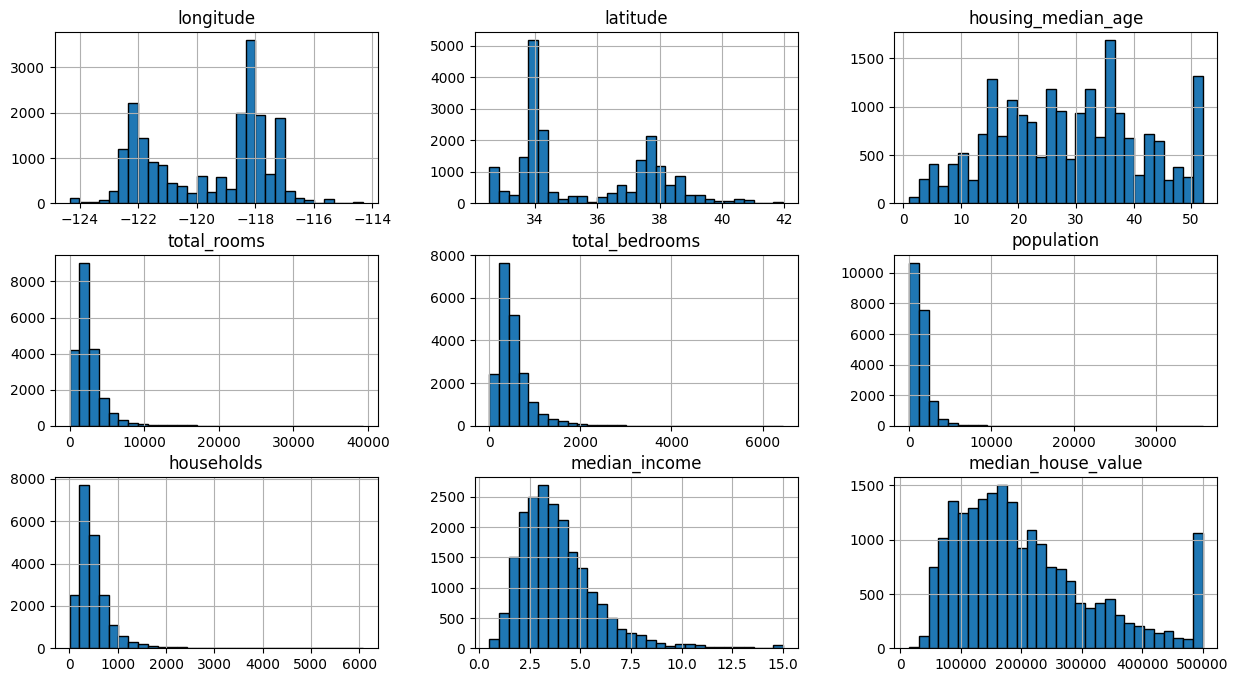

In [10]:
datos.hist(figsize=(15,8),bins=30,edgecolor='black')
